In [1]:
# Convolutional Neural-Network

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Fix random seed
np.random.seed(3)

Using TensorFlow backend.


In [3]:
# Create dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/handmade-mnist/train',  # path to images
        target_size=(24, 24),         # size of each image
        batch_size=3,                 # batch size
        class_mode='categorical')     # classification method to use

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/handmade-mnist/test', 
        target_size=(24, 24), 
        batch_size=3, 
        class_mode='categorical') 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
# Define model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

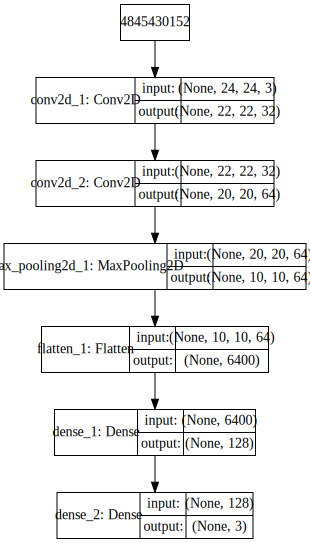

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

# Visualize the model
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
# Configure settings for the upcoming train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model
model.fit_generator(  # when training a batch that is generated from generator, use fit_generator instead of fit
        train_generator, 
        steps_per_epoch=15,  # number of train set / batch_size
        epochs=5,
        validation_data=test_generator,  # 
        validation_steps=5)  # number of validation set / batch_size

Epoch 1/5
15/15 [==============================] - 1s 65ms/step - loss: 0.7327 - acc: 0.7111 - val_loss: 0.2429 - val_acc: 0.9333
Epoch 2/5
15/15 [==============================] - 0s 29ms/step - loss: 0.0956 - acc: 0.9778 - val_loss: 0.1132 - val_acc: 0.9333
Epoch 3/5
15/15 [==============================] - 0s 27ms/step - loss: 0.0144 - acc: 1.0000 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 4/5
15/15 [==============================] - 0s 28ms/step - loss: 6.1044e-04 - acc: 1.0000 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 5/5
15/15 [==============================] - 0s 27ms/step - loss: 2.8565e-04 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000


In [8]:
# Evaluate the model
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

acc: 100.00%
